In [1]:
import xarray as xr
import numpy as np
import glob
import os
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt

### File Path to Weather Anomalies Data

In [2]:
data_path="raw/SEAS5_anomalies"

### Loading Above Ground Biomass Data (Baseline)

In [3]:
agb_data = xr.open_dataset("preprocess/agb_avitabile_2010-2016_v3.nc")

### Loading and Merging the files

In [4]:
#Function to get all file names
def _get_file_list(root):
    files = [join(root, f) for f in listdir(root) if isfile(join(root, f))]
    dirs = [d for d in listdir(root) if isdir(join(root, d))]
    return files
list_files = sorted(_get_file_list(data_path))  #List of data file paths
weather_anomalies_data = xr.open_mfdataset(paths=list_files, parallel=True)

## Before pre-processing

In [5]:
print(weather_anomalies_data)

<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 96)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2017-12-01
Data variables:
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    erate      (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    fg10       (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    si10       (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    swvl1      (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 451, 900), meta=np.ndarray>
    tprate     (time, latitude, longitude) f

In [6]:
print(weather_anomalies_data.to_dataframe().describe())

                d2m         erate          fg10          si10         swvl1  \
count  3.896640e+07  3.896640e+07  3.896640e+07  3.896640e+07  3.896640e+07   
mean  -2.138639e-01  2.056624e-01 -1.384848e+01 -7.620378e+00  7.646027e-04   
std    1.240884e+00  1.061578e+01  7.911637e+02  4.732679e+02  1.321562e-02   
min   -1.338286e+01 -1.669072e+02 -7.321668e+03 -3.941861e+03 -5.363495e-01   
25%   -7.144283e-01 -3.400531e+00 -4.415540e+02 -2.453445e+02 -1.884997e-06   
50%   -1.677427e-01 -1.775455e-02  4.229919e+00  2.579346e+00 -8.940697e-08   
75%    3.475108e-01  3.483377e+00  4.331232e+02  2.403575e+02  2.339482e-06   
max    9.919601e+00  2.041744e+02  8.397738e+03  4.411253e+03  2.944392e-01   

                t2m        tprate  
count  3.896640e+07  3.896640e+07  
mean  -2.234864e-01 -3.585384e-01  
std    1.141739e+00  2.790819e+01  
min   -1.282403e+01 -7.199521e+02  
25%   -6.534031e-01 -5.843658e+00  
50%   -1.610823e-01  4.063644e-01  
75%    2.718088e-01  6.978905e+00  


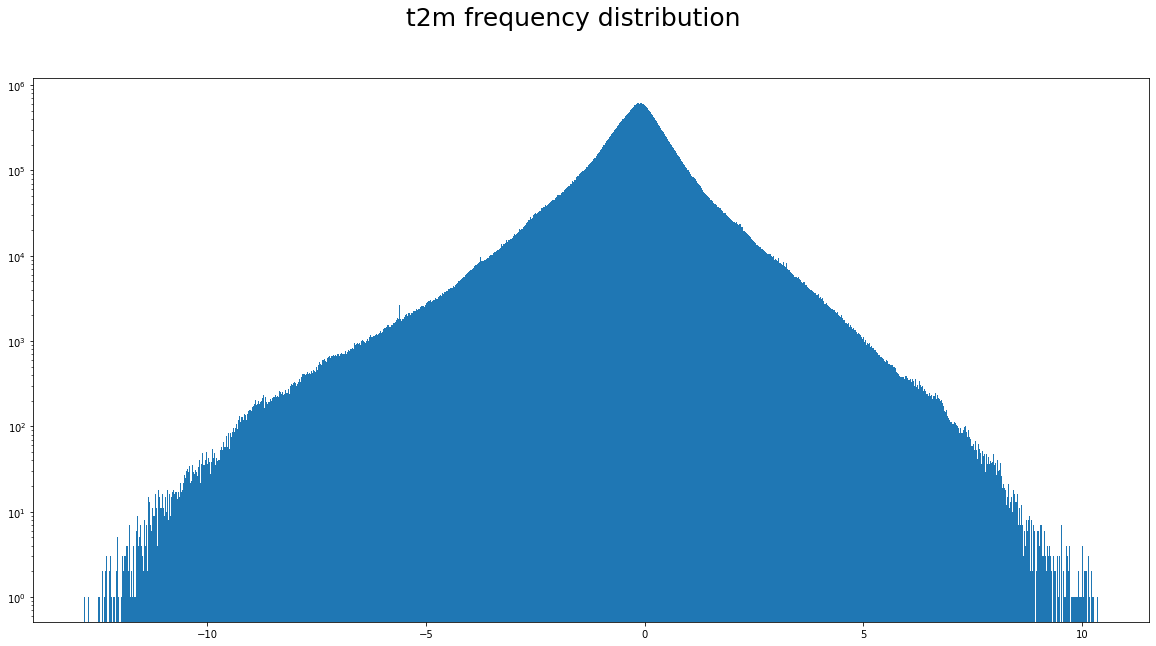

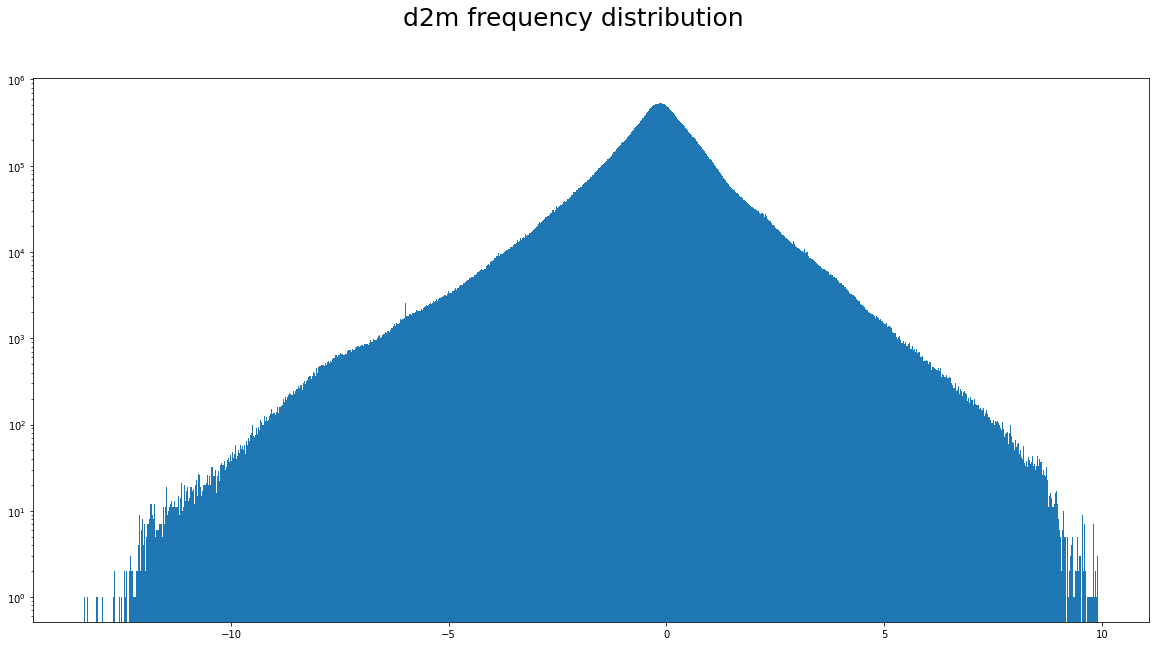

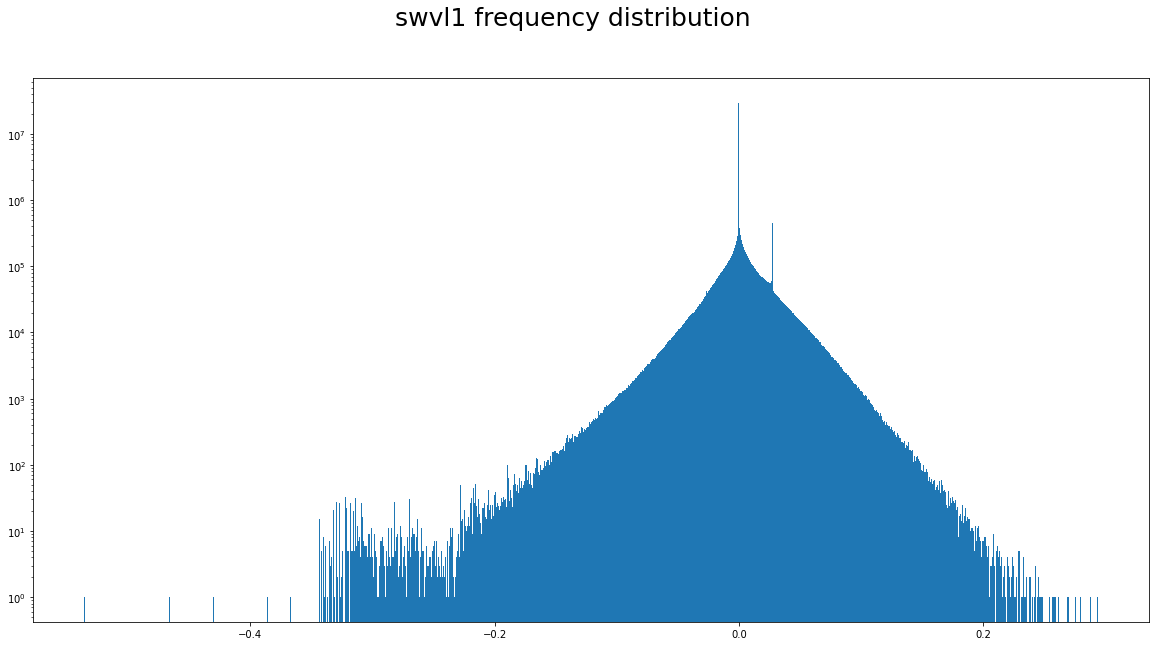

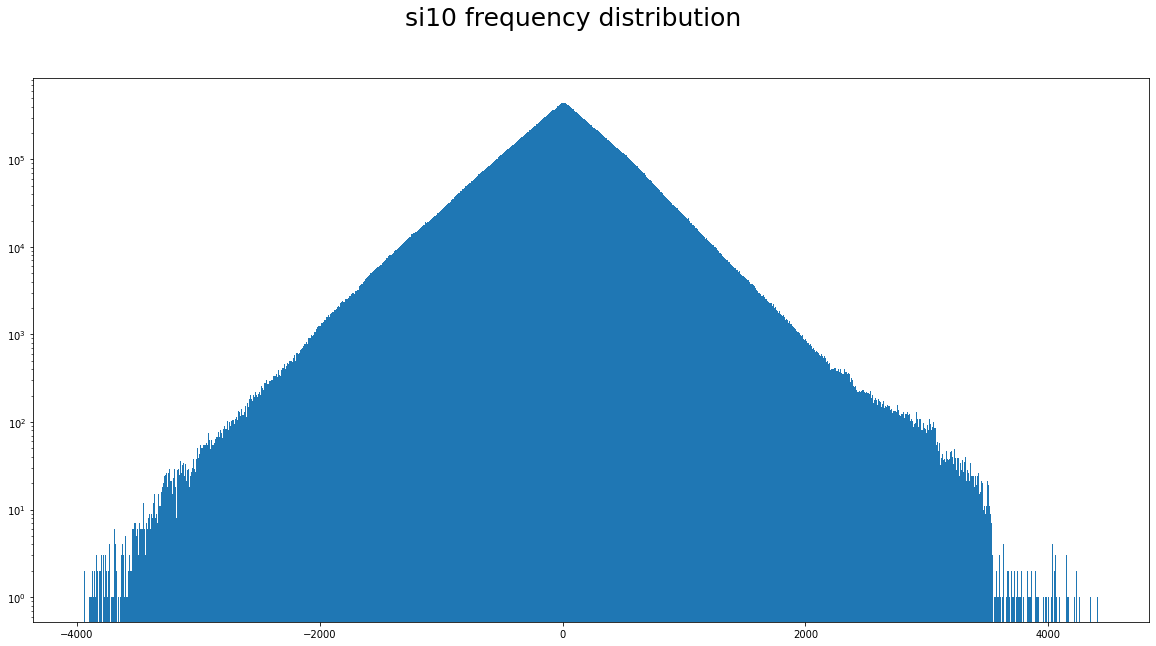

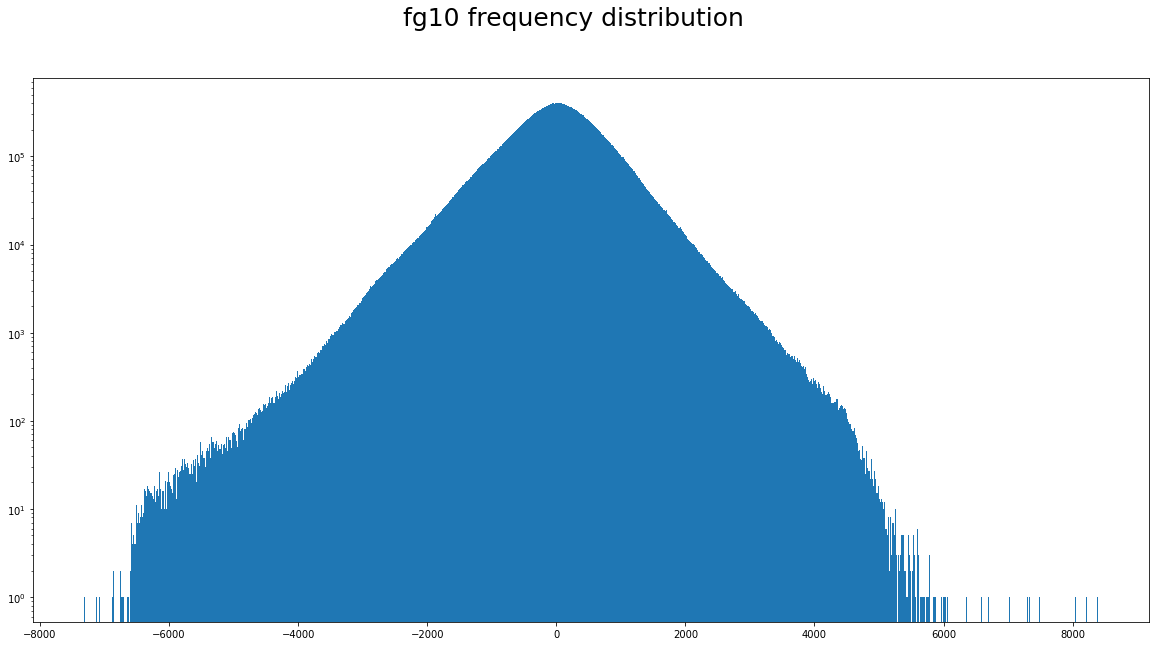

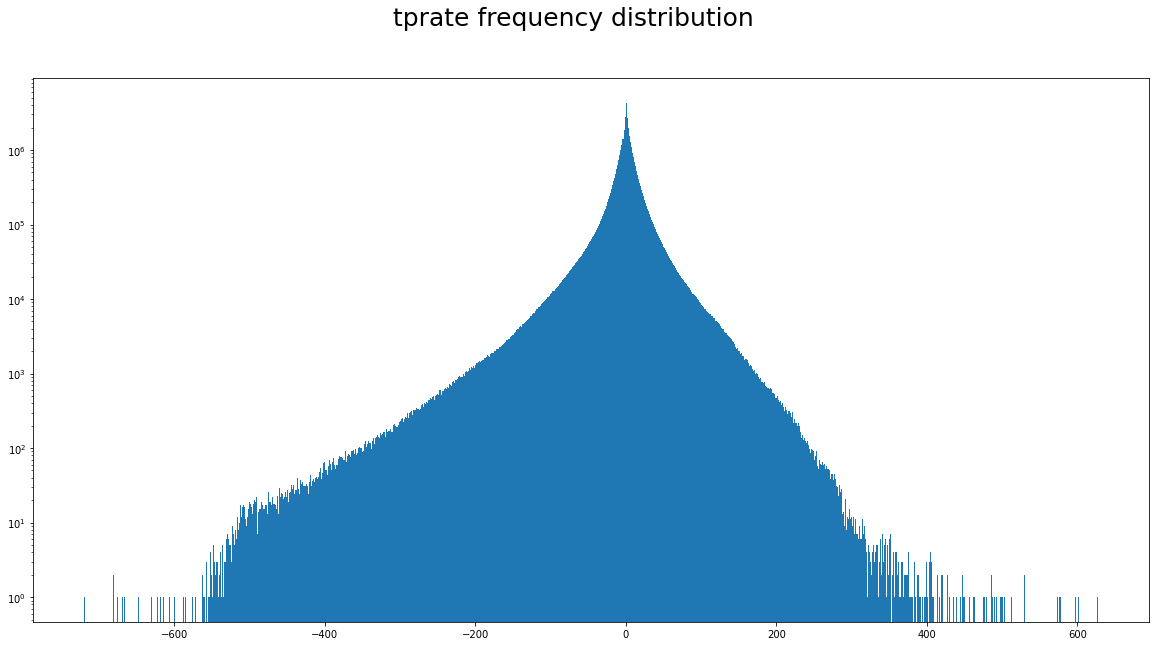

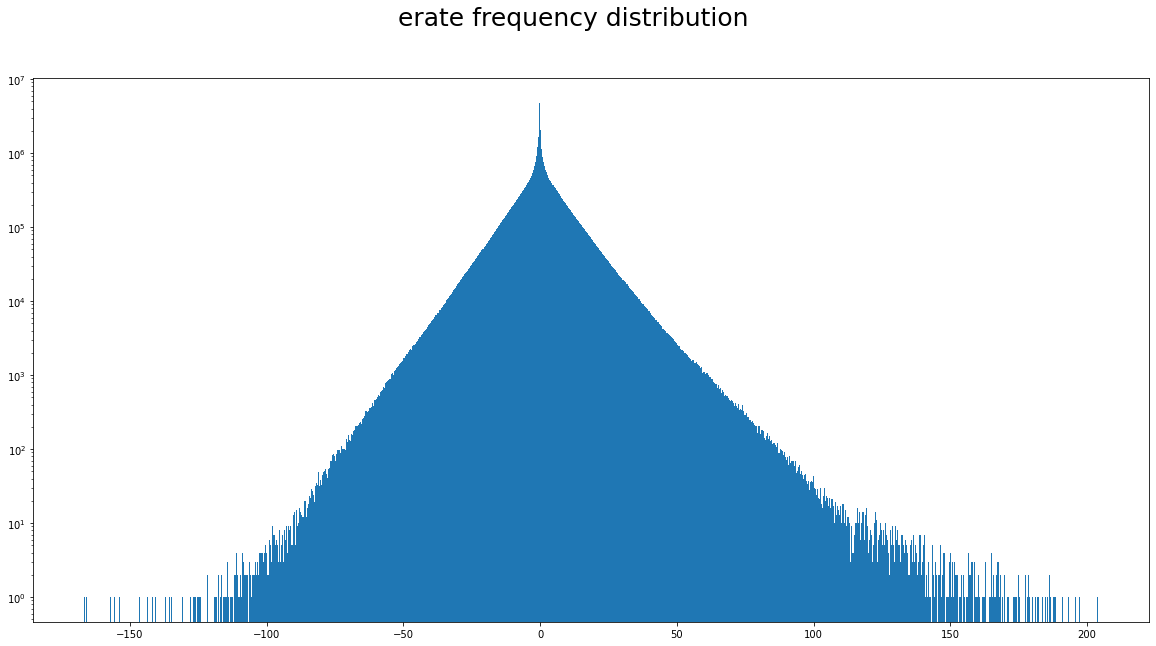

In [7]:
var_list =['t2m', 'd2m', 'swvl1', 'si10', 'fg10', 'tprate', 'erate']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(weather_anomalies_data[var_list[i]].values.flatten(), bins=1000, cumulative=False, log=True)

### Slicing data for time period 2010-2016

In [8]:
weather_anomalies_data = weather_anomalies_data.sel(time=slice(weather_anomalies_data.time.values[0], weather_anomalies_data.time.values[83]))

### Re-Orienting longitude values

In [9]:
weather_anomalies_data = weather_anomalies_data.assign_coords({'latitude':weather_anomalies_data.latitude.values,'longitude':xr.where(weather_anomalies_data.longitude > 180, weather_anomalies_data.longitude - 360, weather_anomalies_data.longitude) })

### Interpolating Data to match resolution of AGB

In [10]:
weather_anomalies_data = weather_anomalies_data.interp({'latitude':agb_data.latitude.values,'longitude':agb_data.longitude.values})

In [11]:
print(weather_anomalies_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    erate      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fg10       (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    si10       (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    swvl1      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tprate     (time, latitude, longi

## After Pre-processing

In [12]:
print(weather_anomalies_data.to_dataframe().describe())

                d2m         erate          fg10          si10         swvl1  \
count  8.697024e+07  8.697024e+07  8.697024e+07  8.697024e+07  8.697024e+07   
mean  -1.882560e-01  1.876207e-01 -1.564758e+01 -9.930058e+00  3.241260e-04   
std    1.237578e+00  1.052696e+01  7.938864e+02  4.759939e+02  1.235854e-02   
min   -1.314905e+01 -1.641837e+02 -7.151116e+03 -3.925143e+03 -2.690543e-01   
25%   -6.965829e-01 -3.381611e+00 -4.405978e+02 -2.463430e+02 -2.011657e-06   
50%   -1.463832e-01 -2.043218e-02  4.009737e+00  2.180600e+00 -2.533197e-07   
75%    3.701758e-01  3.419234e+00  4.308952e+02  2.382083e+02  2.086163e-06   
max    9.838866e+00  1.935255e+02  5.899908e+03  4.331689e+03  2.852716e-01   

                t2m        tprate  
count  8.697024e+07  8.697024e+07  
mean  -1.958153e-01 -3.470980e-01  
std    1.138393e+00  2.818334e+01  
min   -1.262090e+01 -6.653900e+02  
25%   -6.324874e-01 -5.868562e+00  
50%   -1.400390e-01  4.109106e-01  
75%    2.949520e-01  6.968479e+00  


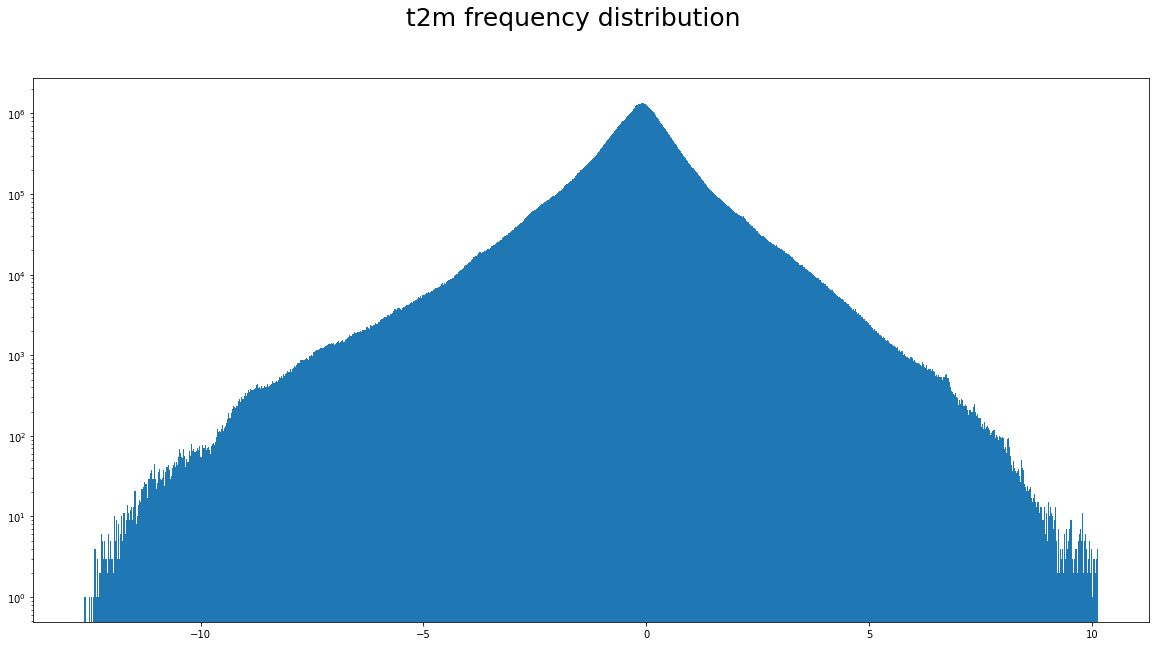

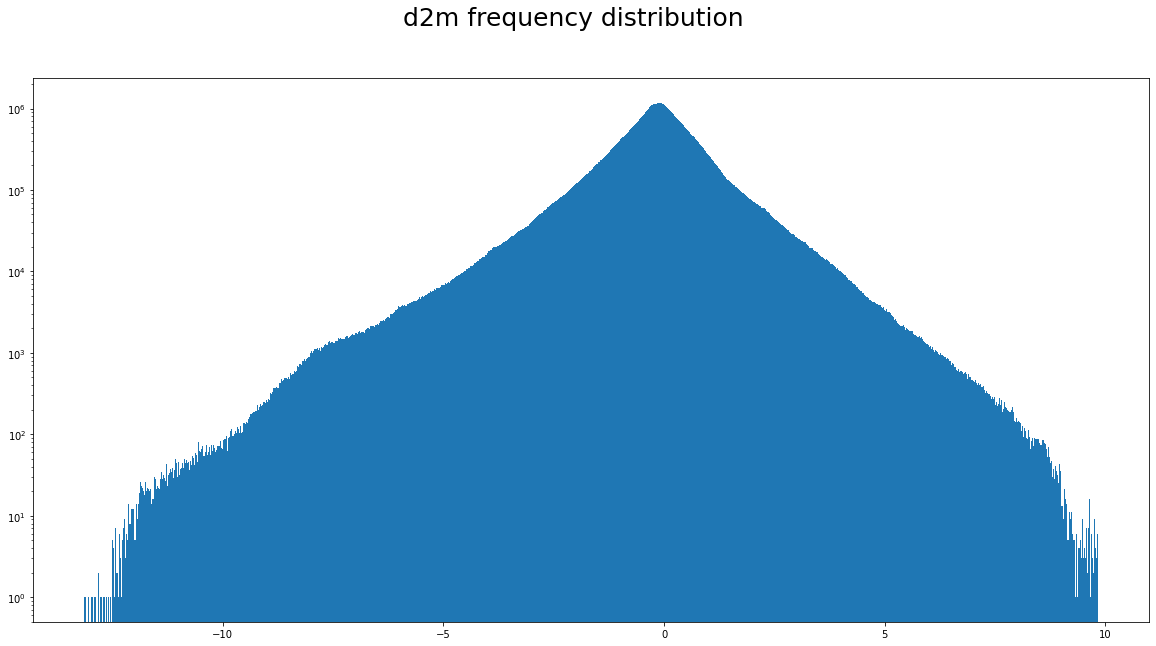

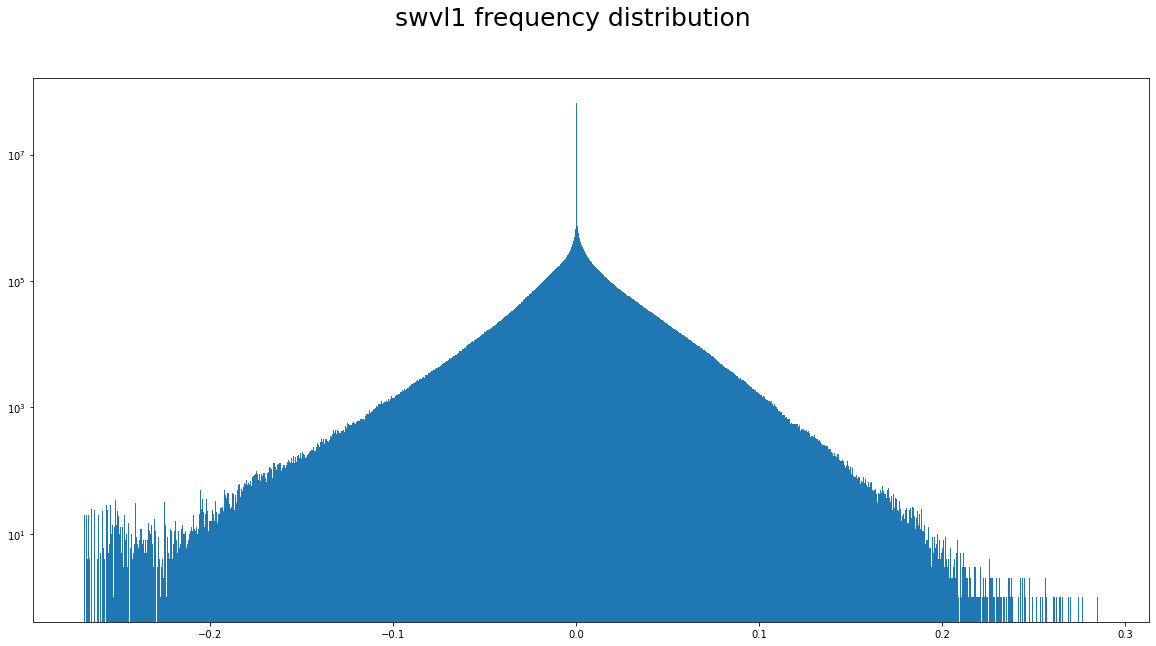

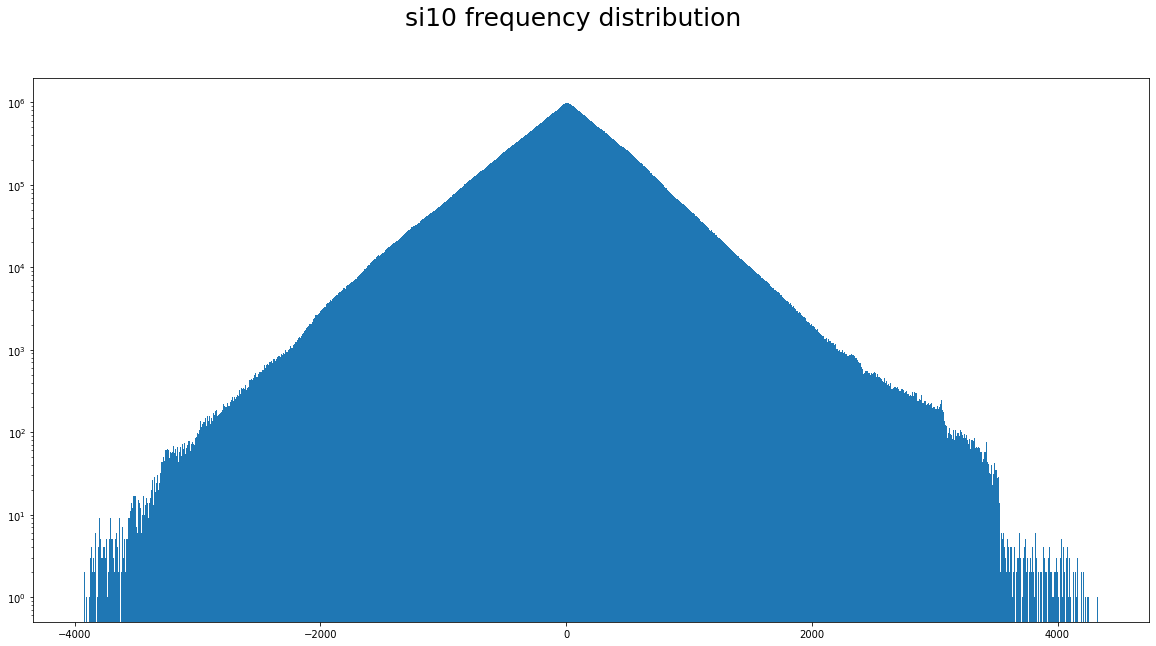

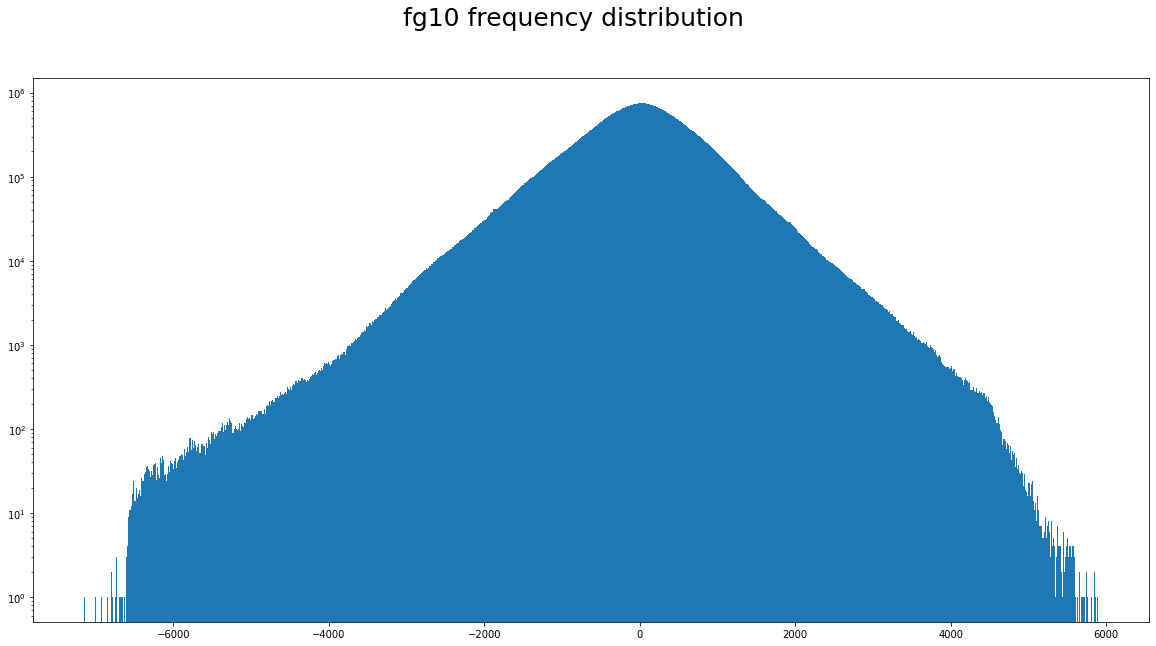

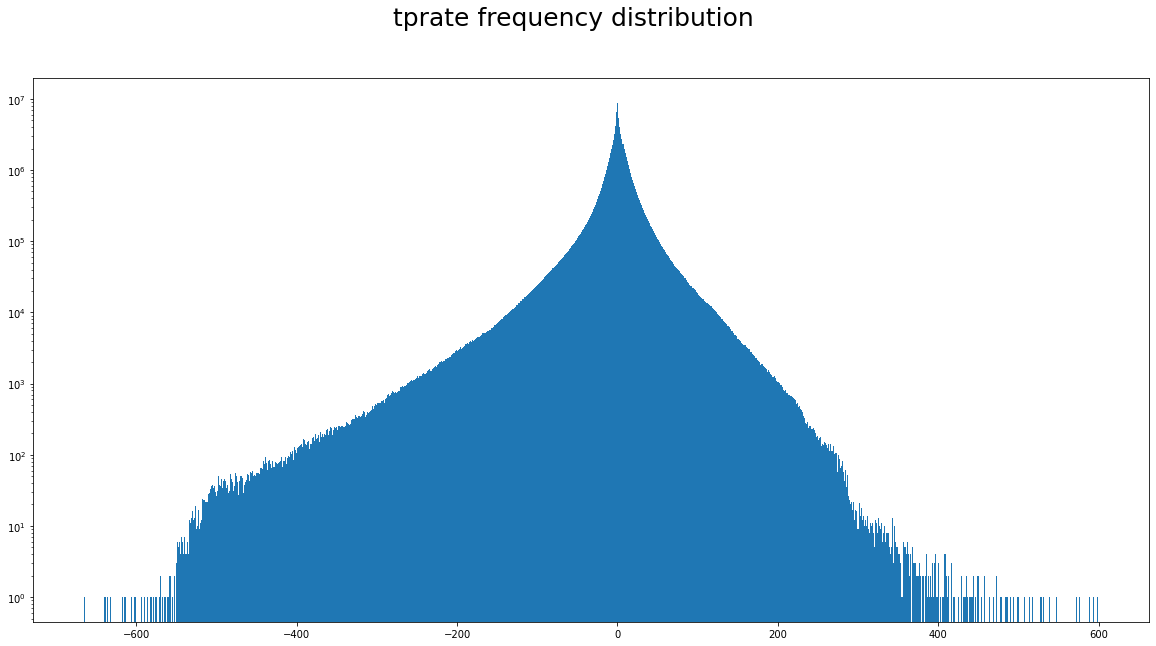

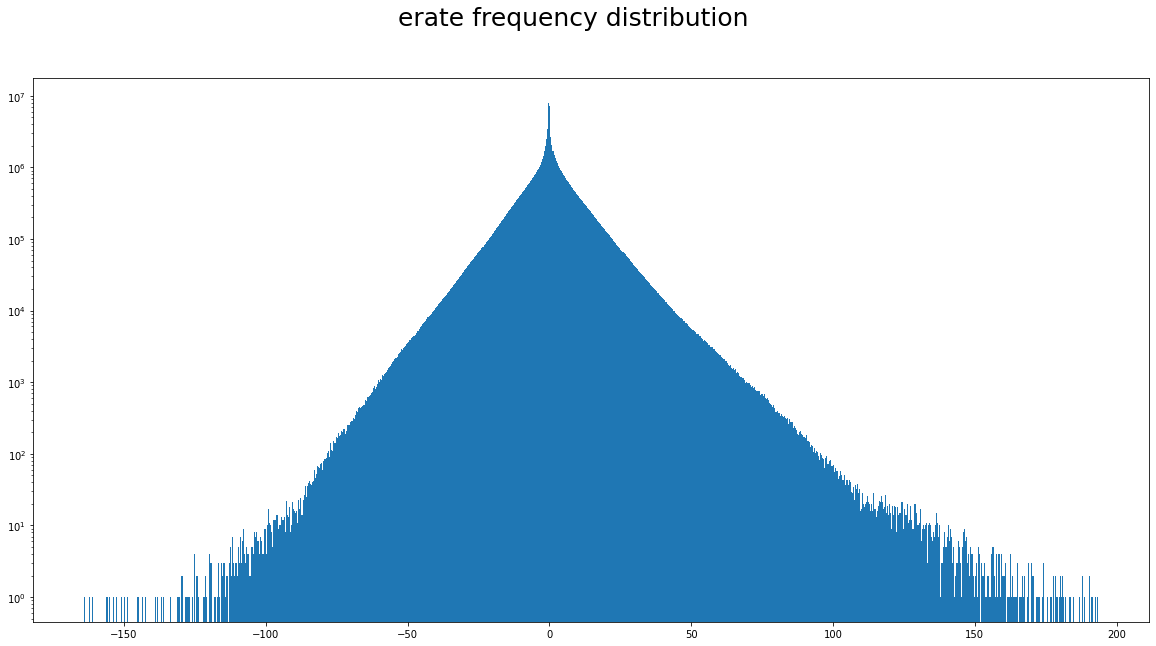

In [13]:
var_list =['t2m', 'd2m', 'swvl1', 'si10', 'fg10', 'tprate', 'erate']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(weather_anomalies_data[var_list[i]].values.flatten(), bins=1000, cumulative=False, log=True)

### Saving Data

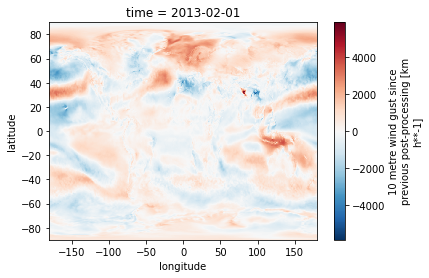

In [14]:
random_date = "201" + str(np.random.randint(0,6)) + "-" + str(np.random.randint(1, 12)) + "-01T00:00:00.000000000"
weather_anomalies_data.sel(time=random_date).fg10.plot()

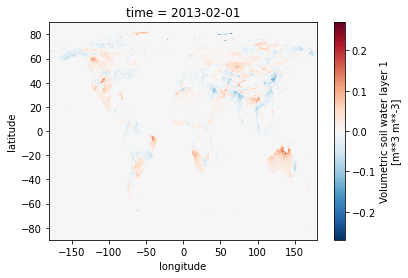

In [15]:
weather_anomalies_data.sel(time=random_date).swvl1.plot()

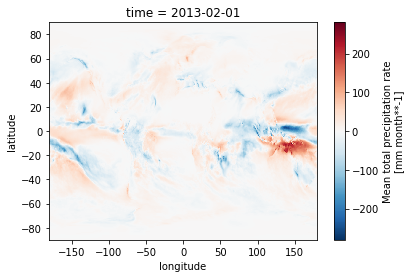

In [16]:
weather_anomalies_data.sel(time=random_date).tprate.plot()

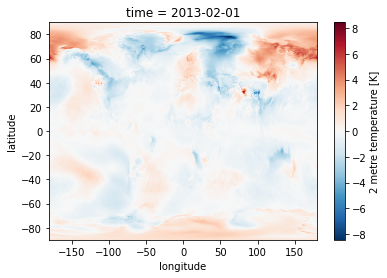

In [17]:
weather_anomalies_data.sel(time=random_date).t2m.plot()

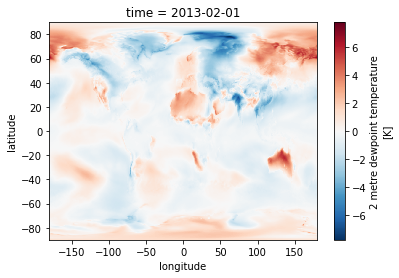

In [18]:
weather_anomalies_data.sel(time=random_date).d2m.plot()

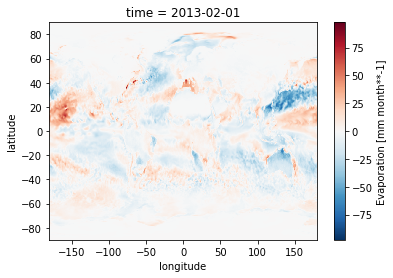

In [19]:
weather_anomalies_data.sel(time=random_date).erate.plot()

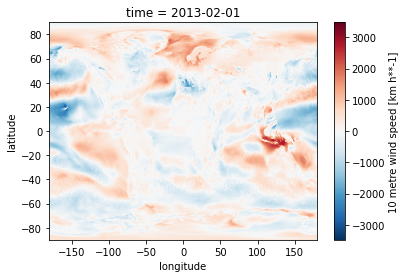

In [20]:
weather_anomalies_data.sel(time=random_date).si10.plot()

In [21]:
weather_anomalies_data.to_netcdf("preprocess/weather_anomalies_2010-2016_v3.nc")

### FIle Size in MB

In [22]:
round(os.stat("preprocess/weather_anomalies_2010-2016_v3.nc").st_size / (1024 * 1024), 3)

2325.612